# Grappa Student Seminar
### Weekly programming assignments - Week 3
#### Dylan van Arneman, Gijs Leguijt, Sven Poelmann, Yoran Yeh
##### June 2019 

[Github link](https://github.com/adam-coogan/GRAPPA_Student_Seminar_2019)


## Imports 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.constants import *
from scipy.optimize import root
from scipy.integrate import *
from scipy.interpolate import interp1d
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

In [2]:
"""Units________________________________________________________________________________________________________________"""
eV      = 1                                                                                                  #Electron volt
J       = eV / e                                                                                                     #Joule
s       = 1 / (hbar * J)                                                                                            #Second
m       = s / c                                                                                                      #Meter
kg      = J * c**(2)                                                                                             #Kilograms
K       = J * k                                                                                                     #Kelvin

"""Constants____________________________________________________________________________________________________________""" 

gr      = 1.0e-3 * kg                                                                                                 #Gram
G       = value("Newtonian constant of gravitation") * (m**3 / (kg * s**2))                                #Newton constant
M_pl    = value('Planck mass') * kg                                                                            #Planck mass
M_sun   = 1.989e30 * kg                                                                                         #Solar mass
m_p     = 1.67e-27 * kg                                                                                        #Proton mass
GeV     = 1.0e9 * eV                                                                                    #Giga electron volt
MeV     = 1.0e6 * eV                                                                                    #Mega electron volt
keV     = 1.0e3 * eV                                                                                    #Kilo electron volt
G_f     = value('Fermi coupling constant') * GeV**-2                                                        #Fermi constant
T_CMB   = 2.725 * K                                                                                        #CMB temperature
pc      = 3.085e16 * m                                                                                              #Parsec
kpc     = 1.0e3 * pc                                                                                           #Kilo parsec
Mpc     = 1.0e6 * pc                                                                                           #Mega parsec
km      = 1.0e3 * m                                                                                              #Kilometer
cm      = 1.0e-2 * m                                                                                            #Centimeter
H       = 67.8 * (km / s) / Mpc                                                                            #Hubble constant
h_hub   = H / (1.0e2 * (km / s) / Mpc)                                                             #Reduced hubble constant
rho_c   = 1.9e-26 * h_hub**2 * kg / m**3                                                                  #Critical density
zheta_3 = 1.202                                                                              #Zheta funtion with argument 3
u       = value('atomic mass constant') * kg                                                              #Atomic mass unit
N_A     = 6.022e23                                                                                       #Avogadro's number
yr      = 3600 * 24 * 365.35 * s                                                                                      #Year

# Tasks

This week we focus on direct detection of dark matter, namely through the Xenon experiments.
In this notebook we tackle two main exercises:

1) First, we calculate the expected 95% C.L. upper limits on the WIMP-proton cross section, as a function of the DM mass.

2) Secondly, we determine the 68% and 95% contours for the DM mass - cross section plane.

In [3]:
A_Xe = 131.293
rho_DM = 0.3 * GeV / cm**3
m_DM = 100 * GeV
v = 220 * km / s

In [4]:
def m_red(m_DM,m_N = m_p):
    """Calculate the reduced mass"""
    return m_DM * m_N / (m_DM + m_N)

def f_r(m_DM,m_N = m_p):
    """Calculate the variable r"""
    return 4 * m_DM * m_N / (m_DM + m_N)**2

# Task 1: Upper limits

In the cells below we determine the 95% upper limits on the cross section as a function of the DM mass. We do this by evaluatiing the DM-Xenon interaction rate, given by:

$ R = R_0 e^{-3 / (r E_0)}$ [(A.P. Colijn, 2015)](https://indico.nikhef.nl/event/869/material/0/1.pdf). Here $R_0$ is the total interaction rate, and we take the recoil energy threshold to be 3 keV.

The total interaction rate $R_0$ is given by  $ R_0 = \frac{ \rho_{DM}}{m_{DM}} \frac{v \sigma N_A}{A_{Xe}} \mu^2 \frac{A_{Xe}}{m_p^2}  $. Here $\mu$ is the reduced mass (defined in the cells above), v is the velocity of the DM with respect to the detector (i.e. the velocity of the sun/earth in the galactic plane), $A_{Xe}$ is the atomic mass number of Xenon. Most of these expressions are defined in the cells above.

In order to determine the 95% C.L. upper limit, we must determine the point at which the interaction rate is equal to three per year. This is all calculated in the cells below.

In [5]:
def NoE(sigma, m_DM, m_det, t):
    """Calculate the number of events"""
    R0 = rho_DM / m_DM * v * sigma * N_A / (A_Xe * gr) * m_red(m_DM)**2 * A_Xe**2 / m_p**2
    E0 = 0.5 * m_DM * v**2
    r = f_r(m_DM, A_Xe * m_p)
    Rate = R0 * np.exp(-3 * keV / (r * E0))
    return Rate * m_det * t

def NoE3(sigma,m_DM,m_det = 500* kg,t = yr):
    return NoE(sigma, m_DM, m_det, t) - 3

In [6]:
def CL95(m_DM):
    """Calculate the upper limit""" 
    return root(NoE3,1.0e-45*cm**2,args=(m_DM))

In [7]:
arr_mass = np.linspace(6*GeV,1.0e3*GeV,1.0e3)
L_sigma = []
for mass in arr_mass:
    L_sigma.append(CL95(mass)['x'])

arr_sigma = np.asarray(L_sigma)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


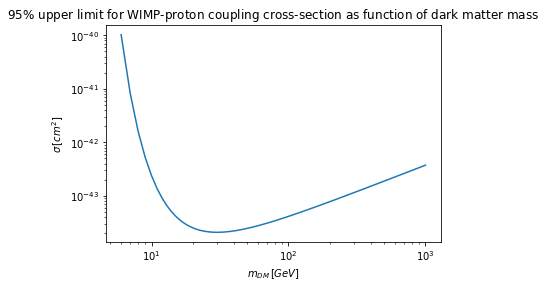

In [8]:
plt.plot(arr_mass/GeV,arr_sigma/cm**2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_{DM}\,[GeV]$')
plt.ylabel(r'$\sigma\,[cm^2]$')
plt.title(r'$95\%$ upper limit for WIMP-proton coupling cross-section as function of dark matter mass')
plt.show()

If we compare this plot to the latest results of the [XENON1T experiment](http://www.xenon1t.org/), we see that the shape of the upper bound is the same, but we are a few orders of magnitude off. The location of the local mimimum is approximately the same.

# Task 2: Confidence level contours

In the cells below we tackle the second task: determining the 68% and 95% C.L. contours in the WIMP-proton coupling cross-section vs DM mass plane.

We take the same expression for the interaction rate as above, and compare it to 'measurements'. We say that there are 10 measured events with recoil energies between 3 keV and 10 keV, and 5 measured events with recoil energies between 10 keV and 20 keV. 

We determine the contour by comparing our model with the measurements using the following $\chi^2$ formula:

$ \chi^2 = \Sigma_i \frac{ (x_i - R_i)^2 }{ R_i }, $ where $x_i$ is the measured interaction rate for a given energy band, and $R_i$ is our modeled interaction rate for a given energy band, DM mass and interaction cross-section.

In [9]:
def NoE_p2(sigma, m_DM, m_det, t, lower = 3, upper = 10):
    """Calculate the number of expected events within a given energy band"""
    R0 = rho_DM / m_DM * v * sigma * N_A / (A_Xe * gr) * m_red(m_DM)**2 * A_Xe**2 / m_p**2
    E0 = 0.5 * m_DM * v**2
    r = f_r(m_DM, A_Xe * m_p)
    Rate = R0 * (np.exp(-lower * keV / (r * E0)) - np.exp(-upper * keV / (r * E0)))
    return Rate * m_det * t

def CHI_CHI(sigma, m_DM, measured, bands, m_det = 500* kg, t = yr):
    """Chi-squared function"""
    chi_sq = 0
    for i in range(len(measured)):
        number = NoE_p2(sigma, m_DM, m_det, t, lower = bands[i][0], upper = bands[i][1])
        chi_sq += ((measured[i]-number)**2 ) /number
    return chi_sq

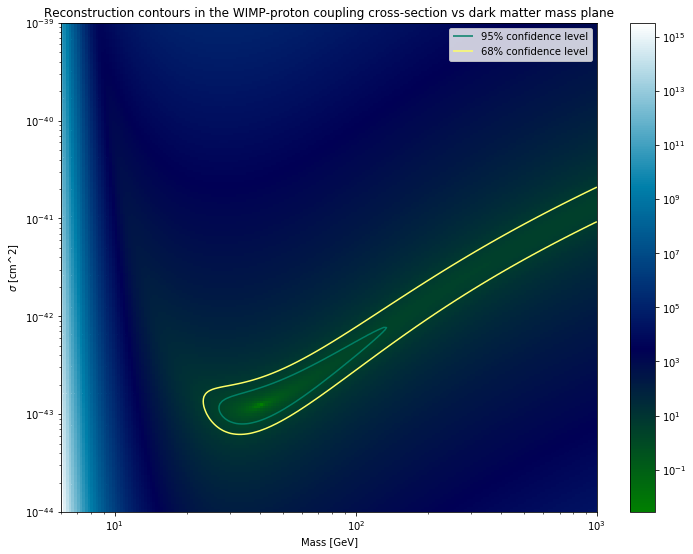

In [11]:
# grid size
num = 200

# create a grid (2d array) with logarithmically spaced masses and cross-sections
MN = np.array([10,5])
bands = np.array([(3,10),(10,20)])
arr_m = np.logspace(np.log(6)/np.log(10),3,num) * GeV
arr_sigma = np.logspace(-39,-44,num) * cm**2
xx, yy = np.meshgrid(arr_m,arr_sigma)

# calculate the value for chi-squared for each point on the grid
heatmap = CHI_CHI(yy, xx, MN, bands, m_det = 500* kg, t = yr)

# determine lowest value of chi-squared and determine 68% and 95% confidence bands corresponding to 2.26 and 6 respectively
lowest_chi = np.amin(heatmap)
niveaus = np.array([0,2.26,6])
niveaus += lowest_chi

plt.figure(1,figsize=(12, 9)) 
plt.pcolormesh(arr_m/GeV,arr_sigma/(cm**2),heatmap[:-1,:-1],cmap = 'ocean',norm = matplotlib.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
cs = plt.contour(arr_m/GeV,arr_sigma/(cm**2),heatmap,cmap = 'summer',levels = niveaus)
plt.xlabel(r'Mass [GeV]')
plt.ylabel(r'$\sigma$ [cm^2]')
plt.title(r'Reconstruction contours in the WIMP-proton coupling cross-section vs dark matter mass plane')

labels = ['95% confidence level','68% confidence level']
for i in range(0,len(labels)):
    cs.collections[i].set_label(labels[i])

plt.legend(loc='upper right')
plt.show()

In the plot above, the yellow contour represents the 95% confidence region, whilst the light-blue line represents the 68% confidence level region. This plot looks very similar to that found by [the Xenon-1-ton project](http://www.xenon1t.org/).

# Other used references and sources

*Notes on direct DM detection by A.P. Colijn "PARTICLE	COSMOLOGY: DM DIRECT	DETECTION", University of Amsterdam,December 2015

*Advanced Statistics lecture notes by C. Weniger, University of Amsterdam, 2019

*Compared our results with the [Xenon 1 ton experiment](http://www.xenon1t.org/)